Coś nie tak z danymi tutaj


## Jakość połączenia bezprzewodowego i przewodowego

Statystyki wydajności:
            Średnia ilość pobranych MB  Odchylenie pobierania  \
Wi-Fi                       243.834043             839.987105   
Przewodowe                  119.450759            1161.513453   

            Średnia ilość wysłanych MB  Odchylenie wysyłania  
Wi-Fi                        25.561717          1.510678e+02  
Przewodowe               785899.643815          1.309436e+09  


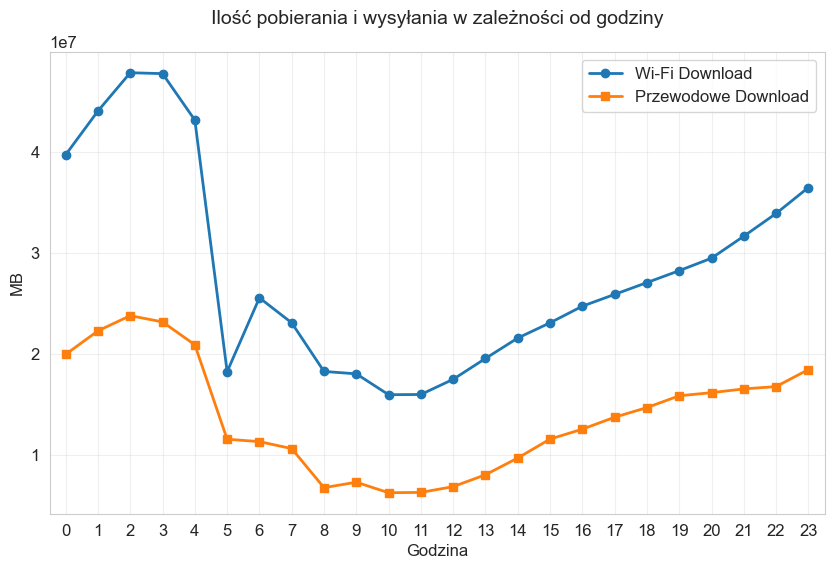

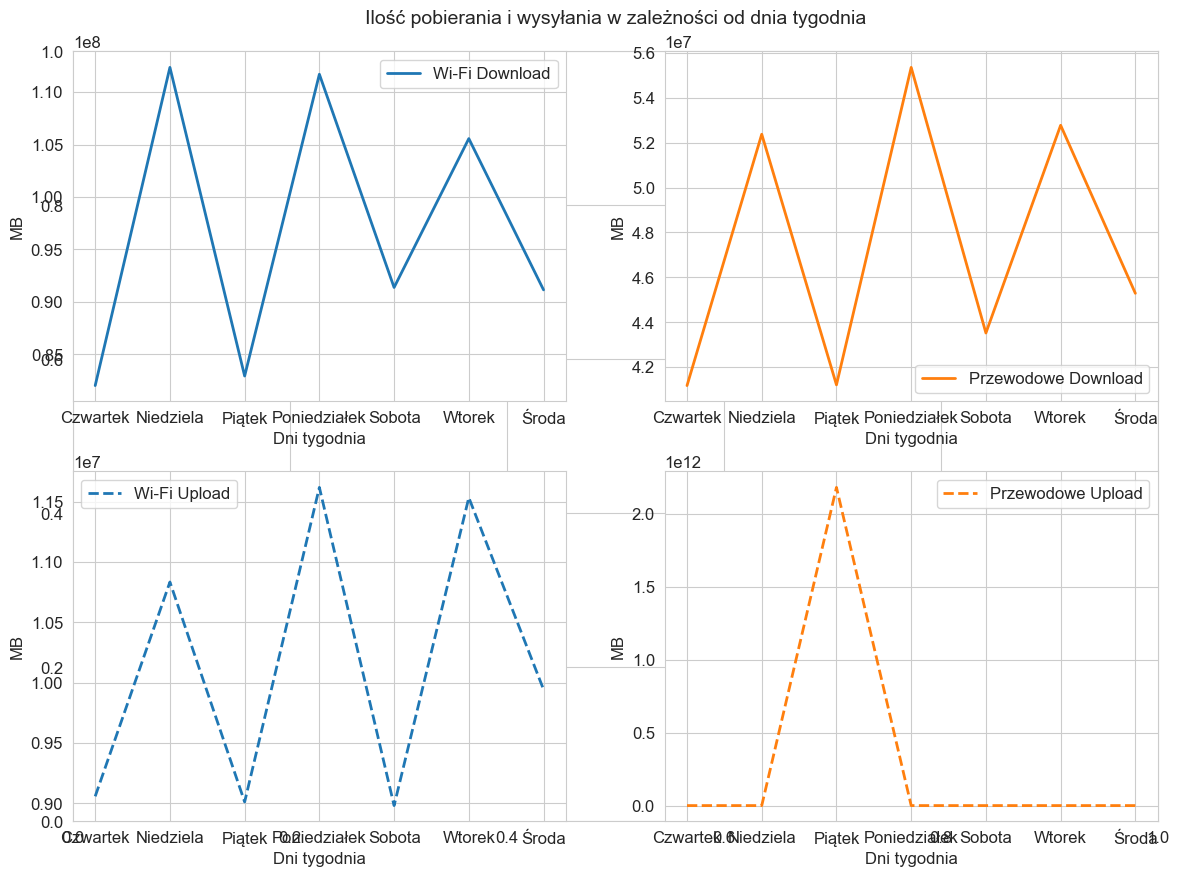

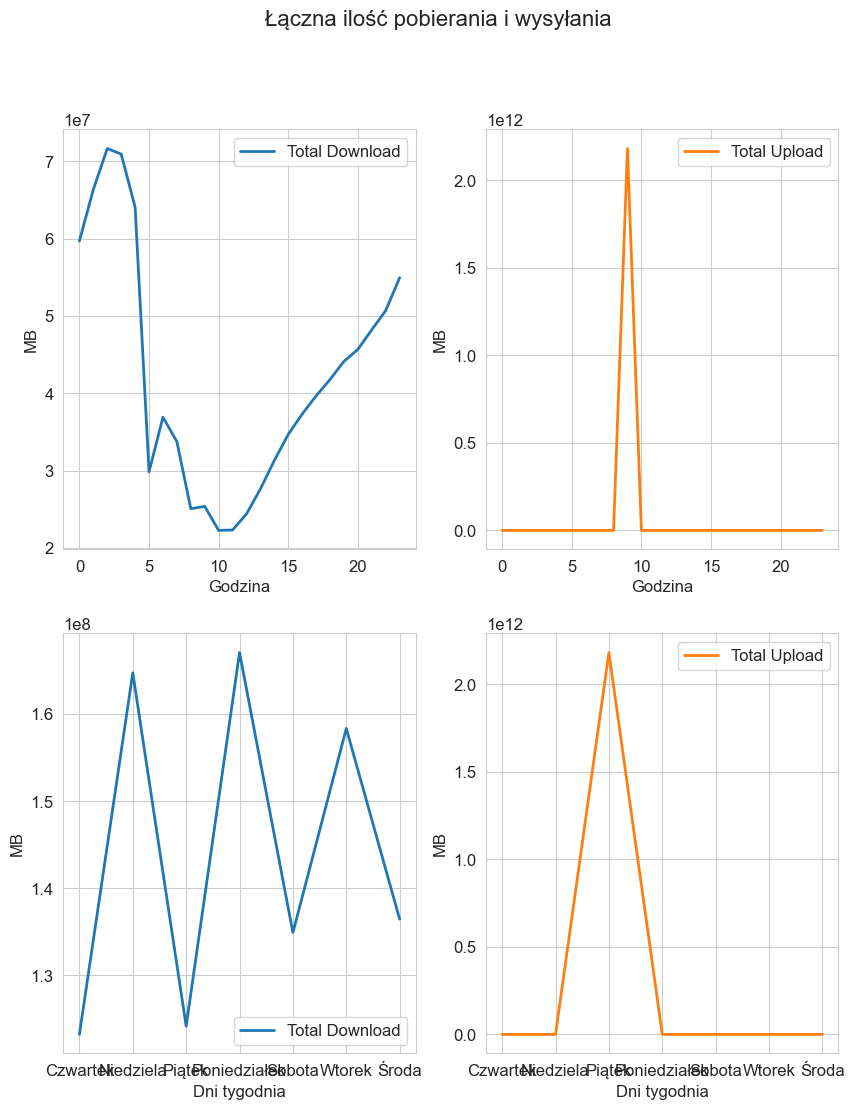

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytaj dane
df = pd.read_csv("data/curr_datausage.csv", parse_dates=["dtime"])

# Oblicz metryki stabilności dla Wi-Fi i przewodowego (download i upload)
metrics = {
    "Wi-Fi": {
        "Średnia ilość pobranych MB": df["cust_wifi_rx_bytes"].mean() / 1e6,
        "Odchylenie pobierania": df["cust_wifi_rx_bytes"].std() / 1e6,
        "Średnia ilość wysłanych MB": df["cust_wifi_tx_bytes"].mean() / 1e6,
        "Odchylenie wysyłania": df["cust_wifi_tx_bytes"].std() / 1e6,
    },
    "Przewodowe": {
        "Średnia ilość pobranych MB": df["cust_wired_rx_bytes"].mean() / 1e6,
        "Odchylenie pobierania": df["cust_wired_rx_bytes"].std() / 1e6,
        "Średnia ilość wysłanych MB": df["cust_wired_tx_bytes"].mean() / 1e6,
        "Odchylenie wysyłania": df["cust_wired_tx_bytes"].std() / 1e6,
    }
}

# Wydrukuj wyniki
print("Statystyki wydajności:")
print(pd.DataFrame(metrics).T)


# Stylowanie wykresów
sns.set_style("whitegrid")


# ----------------------------------------------------------
# WYKRES 1: Prędkość pobierania i wysyłania w zależności od godziny
# ----------------------------------------------------------
df["hour"] = df["dtime"].dt.hour
df["day"] = df["dtime"].dt.day_name("pl_PL")


hourly_df = df.groupby("hour").agg({
    "cust_wifi_rx_bytes": "sum",
    "cust_wired_rx_bytes": "sum",
    "cust_wifi_tx_bytes": "sum",
    "cust_wired_tx_bytes": "sum"
}).reset_index()

day_df = df.groupby("day").agg({
    "cust_wifi_rx_bytes": "sum",
    "cust_wired_rx_bytes": "sum",
    "cust_wifi_tx_bytes": "sum",
    "cust_wired_tx_bytes": "sum"
}).reset_index()



# Konwersja bajtów -> MB
hourly_df["Wi-Fi Download"] = hourly_df["cust_wifi_rx_bytes"] / 1e6
hourly_df["Przewodowe Download"] = hourly_df["cust_wired_rx_bytes"] / 1e6
hourly_df["Wi-Fi Upload"] = hourly_df["cust_wifi_tx_bytes"] / 1e6
hourly_df["Przewodowe Upload"] = hourly_df["cust_wired_tx_bytes"] / 1e6

hourly_df["Total Download"] = hourly_df["Wi-Fi Download"] + hourly_df["Przewodowe Download"]
hourly_df["Total Upload"] = hourly_df["Wi-Fi Upload"] + hourly_df["Przewodowe Upload"]

day_df["Wi-Fi Download"] = day_df["cust_wifi_rx_bytes"] / 1e6
day_df["Przewodowe Download"] = day_df["cust_wired_rx_bytes"] / 1e6
day_df["Wi-Fi Upload"] = day_df["cust_wifi_tx_bytes"] / 1e6
day_df["Przewodowe Upload"] = day_df["cust_wired_tx_bytes"] / 1e6

day_df["Total Download"] = day_df["Wi-Fi Download"] + day_df["Przewodowe Download"]
day_df["Total Upload"] = day_df["Wi-Fi Upload"] + day_df["Przewodowe Upload"]



# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)
plt.plot(hourly_df["hour"], hourly_df["Wi-Fi Download"], 
         label="Wi-Fi Download", marker="o", color="#1f77b4", linewidth=2)
plt.plot(hourly_df["hour"], hourly_df["Przewodowe Download"], 
         label="Przewodowe Download", marker="s", color="#ff7f0e", linewidth=2)
# plt.plot(hourly_df["hour"], hourly_df["Wi-Fi Upload"], 
#          label="Wi-Fi Upload", linestyle="--", marker="x", color="#1f77b4", linewidth=2)
# plt.plot(hourly_df["hour"], hourly_df["Przewodowe Upload"], 
#          label="Przewodowe Upload", linestyle="--", marker="D", color="#ff7f0e", linewidth=2)

plt.title("Ilość pobierania i wysyłania w zależności od godziny", fontsize=14, pad=20)
plt.xlabel("Godzina", fontsize=12)
plt.ylabel("MB", fontsize=12)
plt.xticks(range(0, 24))
plt.xlim(-0.5, 23.5)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

plt.figure(figsize=(14, 10))
# Tworzenie wykresu
plt.title("Ilość pobierania i wysyłania w zależności od dnia tygodnia", fontsize=14, pad=20)

plt.subplot(2, 2, 1)
plt.plot(day_df["day"], day_df["Wi-Fi Download"], 
         label="Wi-Fi Download", color="#1f77b4", linewidth=2)
plt.xlabel("Dni tygodnia", fontsize=12)
plt.ylabel("MB", fontsize=12)
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(day_df["day"], day_df["Przewodowe Download"],
         label="Przewodowe Download",  color="#ff7f0e", linewidth=2)
plt.xlabel("Dni tygodnia", fontsize=12)
plt.ylabel("MB", fontsize=12)
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(day_df["day"], day_df["Wi-Fi Upload"], 
         label="Wi-Fi Upload", linestyle="--",  color="#1f77b4", linewidth=2)
plt.xlabel("Dni tygodnia", fontsize=12)
plt.ylabel("MB", fontsize=12)
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(day_df["day"], day_df["Przewodowe Upload"], 
         label="Przewodowe Upload", linestyle="--",  color="#ff7f0e", linewidth=2)
plt.xlabel("Dni tygodnia", fontsize=12)
plt.ylabel("MB", fontsize=12)
plt.legend()

plt.show()



plt.figure(figsize=(18, 12))


plt.subplot(2, 2, 1)
plt.plot(hourly_df["hour"], hourly_df["Total Download"],
         label="Total Download", color="#1f77b4", linewidth=2)
plt.xlabel("Godzina", fontsize=12)
plt.ylabel("MB", fontsize=12)
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(hourly_df["hour"], hourly_df["Total Upload"],
         label="Total Upload", color="#ff7f0e", linewidth=2)
plt.xlabel("Godzina", fontsize=12)
plt.ylabel("MB", fontsize=12)
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(day_df["day"], day_df["Total Download"],
         label="Total Download", color="#1f77b4", linewidth=2)
plt.xlabel("Dni tygodnia", fontsize=12)
plt.ylabel("MB", fontsize=12)
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(day_df["day"], day_df["Total Upload"],
         label="Total Upload", color="#ff7f0e", linewidth=2)
plt.xlabel("Dni tygodnia", fontsize=12)
plt.ylabel("MB", fontsize=12)
plt.legend()
plt.suptitle("Łączna ilość pobierania i wysyłania", fontsize=16)



plt.show()

